# Bank Marketing

In [656]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [657]:
data=pd.read_csv("bank_data.csv")

In [658]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25250 entries, 0 to 25249
Data columns (total 17 columns):
age          25250 non-null int64
job          25250 non-null object
marital      25250 non-null object
education    25250 non-null object
default      25250 non-null object
balance      25250 non-null int64
housing      25250 non-null object
loan         25250 non-null object
contact      25250 non-null object
day          25250 non-null int64
month        25250 non-null object
duration     25250 non-null int64
campaign     25250 non-null int64
pdays        25250 non-null int64
previous     25250 non-null int64
poutcome     25250 non-null object
subscribe    25250 non-null object
dtypes: int64(7), object(10)
memory usage: 3.3+ MB


Checked for Null values. No Null values found

In [659]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,30,services,single,secondary,no,-158,yes,no,cellular,12,may,426,1,370,2,failure,yes
1,34,blue-collar,married,unknown,no,11,yes,no,cellular,8,apr,233,1,-1,0,unknown,no
2,43,blue-collar,married,primary,no,-59,yes,no,unknown,20,jun,205,5,-1,0,unknown,no
3,32,management,married,tertiary,no,1812,no,no,cellular,4,aug,296,1,182,4,other,yes
4,33,management,married,secondary,yes,7,no,yes,cellular,20,aug,239,2,-1,0,unknown,no


### Data Cleaning And Feature Engineering.

###### Age

In [660]:
data.age.unique()

array([30, 34, 43, 32, 33, 41, 60, 44, 40, 31, 54, 26, 36, 38, 58, 28, 27,
       47, 49, 55, 56, 35, 48, 57, 45, 53, 51, 39, 52, 37, 50, 92, 42, 23,
       71, 29, 25, 59, 79, 24, 46, 63, 61, 21, 77, 76, 66, 85, 72, 65, 70,
       64, 62, 68, 69, 74, 22, 20, 73, 78, 86, 67, 75, 80, 81, 83, 87, 93,
       19, 82, 18, 89, 84, 90, 95], dtype=int64)

Dividing 'age' into categories and recreating 'age' feature.

In [661]:
age_categories=[]
for age in data.age:
    if age<=35:
        age_categories.append("<=35")
    elif age>35 and age<=60:
        age_categories.append("36-60")
    else:
        age_categories.append(">60")
data.drop("age",axis=1,inplace=True)
data["age"]=age_categories

In [662]:
data.age.unique()

array(['<=35', '36-60', '>60'], dtype=object)

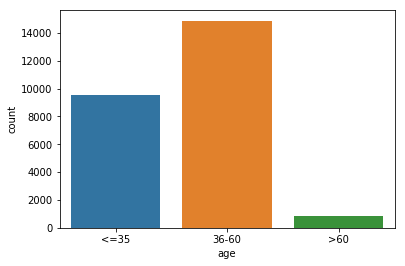

In [663]:
sb.countplot(data.age)

###### Job

In [664]:
data.job.unique()

array(['services', 'blue-collar', 'management', 'admin.', 'technician',
       'retired', 'self-employed', 'housemaid', 'unemployed',
       'entrepreneur', 'unknown', 'student'], dtype=object)

In [665]:
x=data["job"][data["job"]=='unknown'].count()/len(data.job)
x
#The count of unknown is very less.

0.006217821782178218

Replacing 'admin.' with 'administrator' and 'unknown' with mode due to less count.

In [666]:
data.job.replace("admin.","administrator",inplace=True)
data.job.replace("unknown","blue-collar",inplace=True)

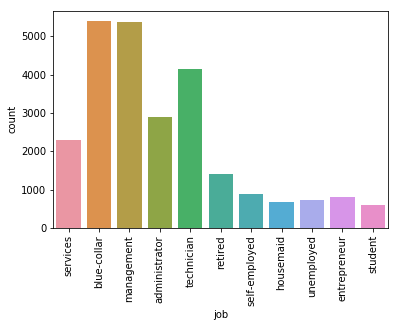

In [667]:
plt.xticks(rotation=90)
sb.countplot(data.job)

###### Marital

In [668]:
data.marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

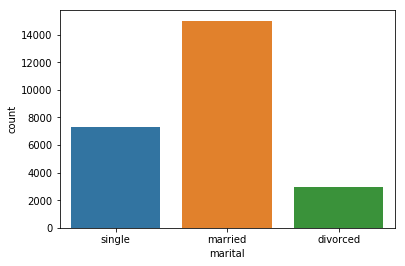

In [669]:
sb.countplot(data.marital)

###### Education

In [670]:
data.education.unique()

array(['secondary', 'unknown', 'primary', 'tertiary'], dtype=object)

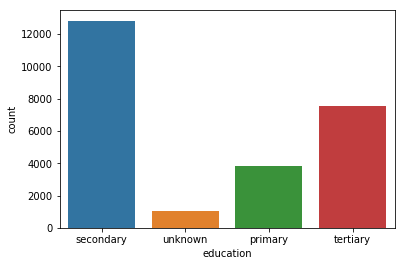

In [671]:
sb.countplot(data.education)

In [672]:
x=data["education"][data["education"]=='unknown'].count()/len(data.education)
x
#The count of unknown is very less.

0.041861386138613864

Count of unknown is very less, so, replacing it with mode.

In [673]:
data.education.replace("unknown","secondary",inplace=True)

###### Default

In [674]:
data.default.unique()

array(['no', 'yes'], dtype=object)

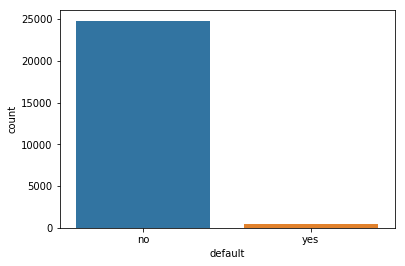

In [675]:
sb.countplot(data.default)

Dropping feature 'default' since the count of 'yes' is minimal and hence the feature becomes useless. So, dropping it.

In [676]:
data.drop('default',axis=1,inplace=True)

###### Balance

In [677]:
max(data.balance.unique())

81204

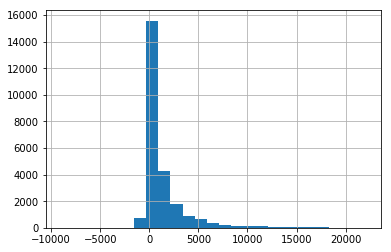

In [678]:
data['balance'].hist(bins=25,range=(-9000,22000))

Let's check for outliers.

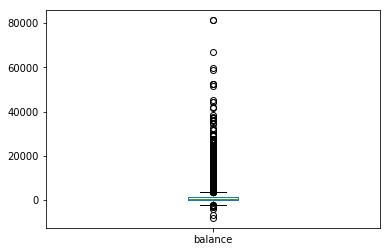

In [679]:
data.balance.plot(kind='box')

This dataset contains outliers. Hence, removing them.

In [680]:
data=data[data.balance<20000]
data=data[data.balance>-5000]

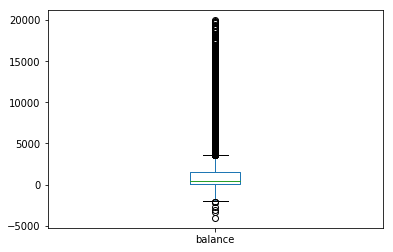

In [681]:
data.balance.plot(kind='box')

Dividing 'balance' into categories and recreating 'balance' feature.

In [682]:
balance=[]
for bal in data.balance:
    if(bal<=0):
        balance.append('<=0')
    elif(bal>0 and bal<=1000):
        balance.append('1-1000')
    else:
        balance.append(">1000")
data.drop('balance',axis=1,inplace=True)
data['balance']=balance

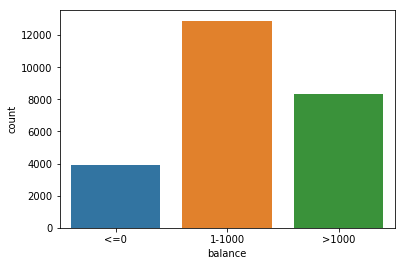

In [683]:
sb.countplot(data.balance)

###### Housing

In [684]:
data.housing.unique()

array(['yes', 'no'], dtype=object)

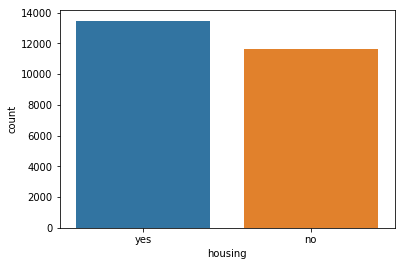

In [685]:
sb.countplot(data.housing)

###### Loan

In [686]:
data.loan.unique()

array(['no', 'yes'], dtype=object)

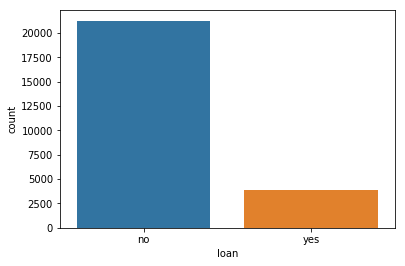

In [687]:
sb.countplot(data.loan)

###### Contact

In [688]:
data.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

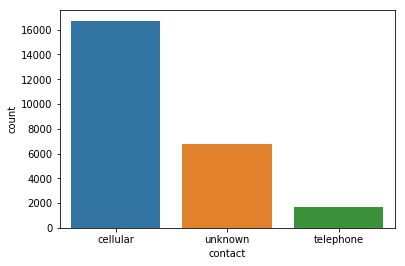

In [689]:
sb.countplot(data.contact)

###### Day

In [690]:
data.day.unique()

array([12,  8, 20,  4, 14, 17, 13, 11, 28,  3, 15, 22, 29, 23,  9, 19,  6,
       18,  5, 27,  7, 25,  2, 10, 26, 30, 21, 24, 16, 31,  1],
      dtype=int64)

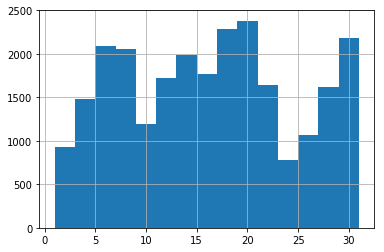

In [691]:
data.day.hist(bins=15)

Dividing 'day' into different categories and recreating 'day'.

In [692]:
days=[]
for day in data.day:
    if day<=5:
        days.append("<=5")
    elif day>5 and day<=10:
        days.append("6-10")
    elif day>10 and day<=15:
        days.append("11-15")
    elif day>15 and day<=20:
        days.append("16-20")
    elif day>20 and day<=25:
        days.append("21-25")
    elif day>25 and day<=30:
        days.append("26-30")
    else:
        days.append(">30")
data.drop('day',axis=1,inplace=True)
data['day']=days

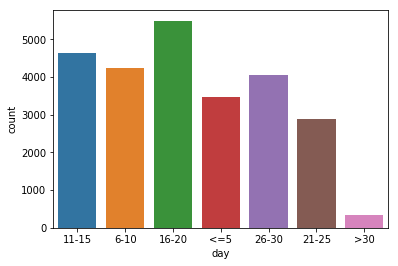

In [693]:
sb.countplot(data.day)

###### Month

In [694]:
data.month.unique()

array(['may', 'apr', 'jun', 'aug', 'sep', 'nov', 'feb', 'jul', 'jan',
       'oct', 'dec', 'mar'], dtype=object)

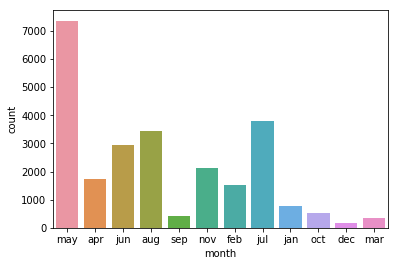

In [695]:
sb.countplot(data.month)

###### Duration

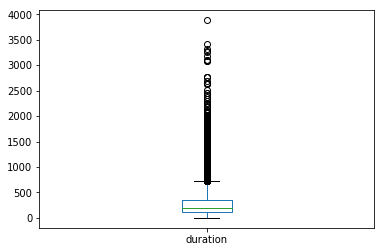

In [696]:
data.duration.plot(kind='box')
#This feature has some outliers.

Handling Outliers.

In [697]:
 data=data[data.duration<1000]

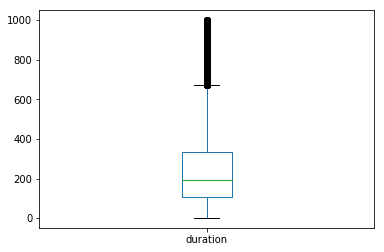

In [698]:
data.duration.plot(kind='box')

Dividing 'duration' into different categories and recreating 'duration'.

In [699]:
dura=[]
for dur in data.duration:
    if dur<=175:
        dura.append("<=175")
    elif dur>175 and dur<=400:
        dura.append("176-400")
    elif dur>400 and dur<=625:
        dura.append("401-625")
    else:
        dura.append(">625")
data.drop('duration',axis=1,inplace=True)
data['duration']=dura

###### Campaign

In [700]:
data.campaign.unique()

array([ 1,  5,  2,  3,  4,  8,  7,  6,  9, 11, 10, 12, 15, 14, 19, 13, 17,
       16, 20, 28, 18, 31, 21, 32, 24, 30, 33, 22, 23, 27, 25, 29, 36, 38,
       26, 41, 58, 35, 39, 34, 51], dtype=int64)

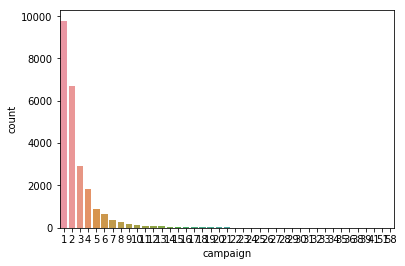

In [701]:
sb.countplot(data.campaign)

Since,the count of values greater than 5 is very less, so, changing values of campaign into 1, 2, 3, 4, >=5 .Hence, dividing campaign into 5 categories.

In [702]:
data.campaign[data.campaign>4]='>=5'
data.campaign[data.campaign==4]='4'
data.campaign[data.campaign==3]='3'
data.campaign[data.campaign==2]='2'
data.campaign[data.campaign==1]='1'

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shub

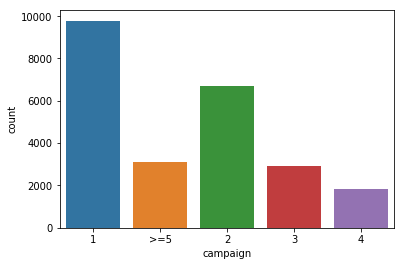

In [703]:
sb.countplot(data.campaign)

###### Previous

In [704]:
data.previous.unique()

array([ 2,  0,  4, 10,  1,  5,  7,  6,  8,  3, 11, 32,  9, 16, 13, 12, 58,
       17, 30, 18, 19, 20, 37, 14, 15, 27, 22, 24, 23, 26, 25, 55, 21, 28,
       51, 40, 29], dtype=int64)

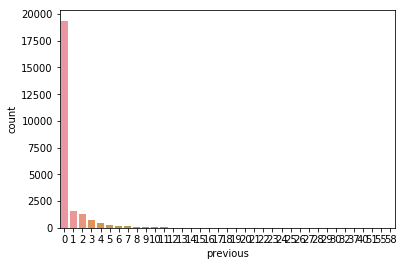

In [705]:
sb.countplot(data.previous)

Since the count of category 0 is very large and it shows that the client was not contacted before. So, changing 'previous' into 'previous_contact' having 0 for client 'not contacted' and 1 for 'contacted' earlier.

In [706]:
#converting previous into 0 for previous contact and 1 for no previous contact. Also, dropping pdays 
#because it is another way of representing previous.

data['previous_contact']=['0' if pre==0 else '1' for pre in data['previous']]

In [707]:
data.drop('previous',axis=1,inplace=True)
data.drop('pdays',axis=1,inplace=True)

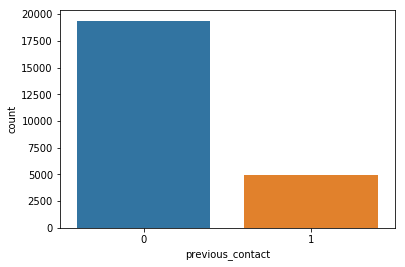

In [708]:
sb.countplot(data.previous_contact)

###### Poutcome

In [709]:
data.poutcome.unique()

array(['failure', 'unknown', 'other', 'success'], dtype=object)

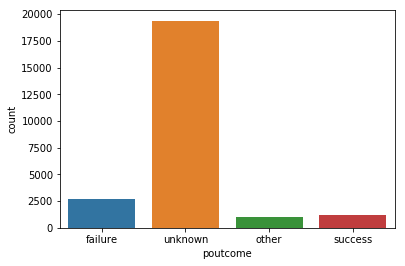

In [710]:
sb.countplot(data.poutcome)

In [711]:
data.poutcome.replace('other','unknown',inplace=True)

Since 'other' and ' unknown' are unnecessary for analysis, so, making them as one.

In [712]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24302 entries, 0 to 25249
Data columns (total 15 columns):
job                 24302 non-null object
marital             24302 non-null object
education           24302 non-null object
housing             24302 non-null object
loan                24302 non-null object
contact             24302 non-null object
month               24302 non-null object
campaign            24302 non-null object
poutcome            24302 non-null object
subscribe           24302 non-null object
age                 24302 non-null object
balance             24302 non-null object
day                 24302 non-null object
duration            24302 non-null object
previous_contact    24302 non-null object
dtypes: object(15)
memory usage: 3.6+ MB


### Bivariate Analysis

Text(0,0.5,'percentage of subscribe category')

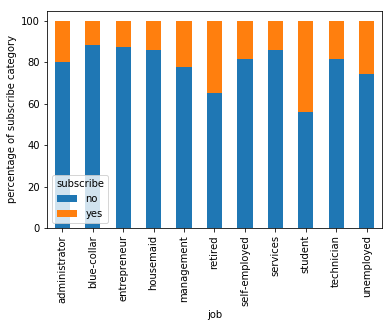

In [713]:
grouped_data=data.groupby(['job','subscribe']).size().astype(float)
column_count=data['job'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

In [714]:
#Making entrepreneur, housemaid and services as one.
#Making self-employed, technician as one.

replace_dict={
    'housemaid':'services',
    'self-employed':'technician'
}

for category in replace_dict:
    data['job'].replace(category,replace_dict[category],inplace=True)

Text(0,0.5,'percentage of subscribe category')

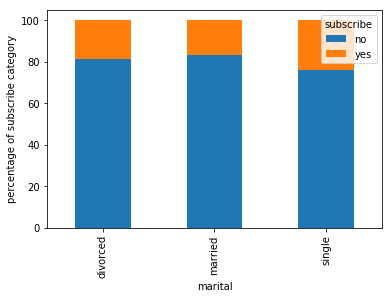

In [715]:
grouped_data=data.groupby(['marital','subscribe']).size().astype(float)
column_count=data['marital'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

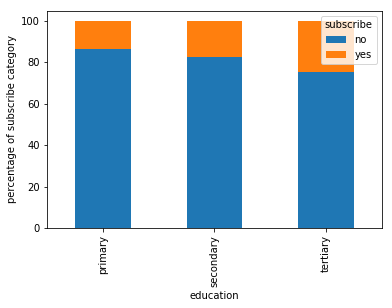

In [716]:
grouped_data=data.groupby(['education','subscribe']).size().astype(float)
column_count=data['education'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

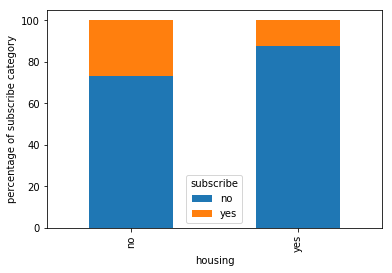

In [717]:
grouped_data=data.groupby(['housing','subscribe']).size().astype(float)
column_count=data['housing'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

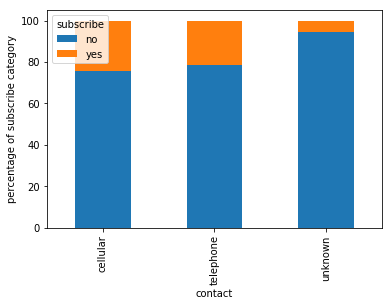

In [718]:
grouped_data=data.groupby(['contact','subscribe']).size().astype(float)
column_count=data['contact'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

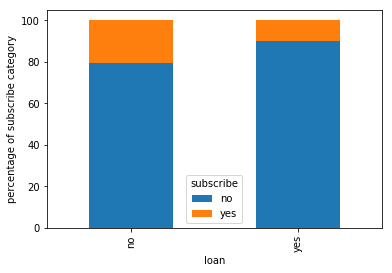

In [719]:
grouped_data=data.groupby(['loan','subscribe']).size().astype(float)
column_count=data['loan'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

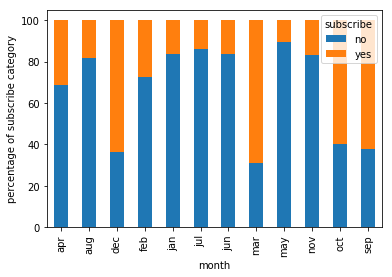

In [720]:
grouped_data=data.groupby(['month','subscribe']).size().astype(float)
column_count=data['month'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

In [721]:
#Making dec and sep as one.
#Making jan, jun, nov as one.

replace_dict={
    'jun':'jan',
    'nov':'jan'
}

for category in replace_dict:
    data['month'].replace(category,replace_dict[category],inplace=True)

Text(0,0.5,'percentage of subscribe category')

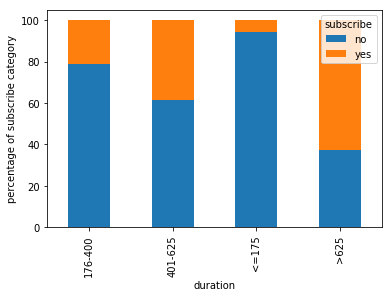

In [722]:
grouped_data=data.groupby(['duration','subscribe']).size().astype(float)
column_count=data['duration'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

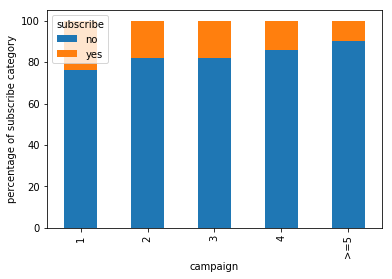

In [723]:
grouped_data=data.groupby(['campaign','subscribe']).size().astype(float)
column_count=data['campaign'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

In [724]:
#Making 2 and 3 as one.

data.campaign.replace('3','2',inplace=True)

Text(0,0.5,'percentage of subscribe category')

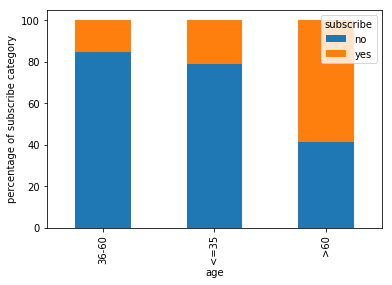

In [725]:
grouped_data=data.groupby(['age','subscribe']).size().astype(float)
column_count=data['age'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

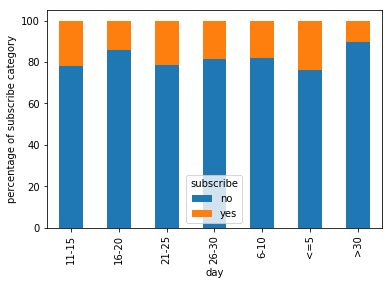

In [726]:
grouped_data=data.groupby(['day','subscribe']).size().astype(float)
column_count=data['day'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

In [727]:
#Making '11-15' and '21-25' as one.
#Making '26-30' and '6-10' as one.

data.day.replace('21-25','11-15',inplace=True)
data.day.replace('26-30','6-10',inplace=True)

Text(0,0.5,'percentage of subscribe category')

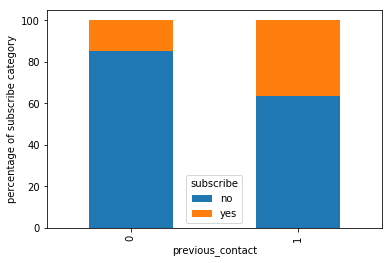

In [728]:
grouped_data=data.groupby(['previous_contact','subscribe']).size().astype(float)
column_count=data['previous_contact'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

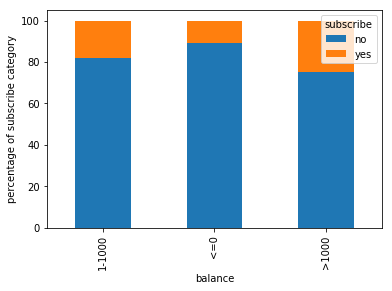

In [729]:
grouped_data=data.groupby(['balance','subscribe']).size().astype(float)
column_count=data['balance'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

Text(0,0.5,'percentage of subscribe category')

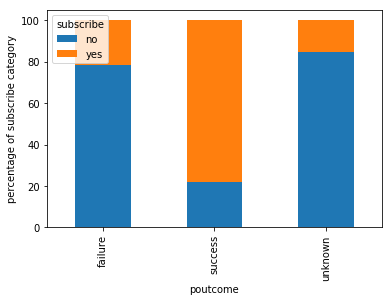

In [730]:
grouped_data=data.groupby(['poutcome','subscribe']).size().astype(float)
column_count=data['poutcome'].value_counts()
for category in grouped_data.index.levels[0]:
    for sub in grouped_data[category].index:
        grouped_data[category][sub]=grouped_data[category][sub]/column_count[category]*100
grouped_data.unstack().plot(kind='bar',stacked=True)
plt.ylabel('percentage of subscribe category')

In [731]:
X=data.iloc[:,0:15]
X.drop('subscribe',axis=1,inplace=True)
Y=data['subscribe']
columns=list(data.columns)
columns.remove('subscribe')

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Label Encoding

In [732]:
le=LabelEncoder()
for column in columns:
    X[column]=le.fit_transform(X[column])
Y=[0 if sub=='no' else 1 for sub in Y]

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### One - Hot Encoding

In [733]:
X=pd.get_dummies(X,columns=columns)

### Train - Test Split

In [734]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=1)

### Logistic Regression

In [735]:
logreg=LogisticRegression()
logreg.fit(train_x,train_y)
print("Accuracy on train data:")
logreg.score(train_x,train_y)

Accuracy on train data:


0.8656962090427447

### Final Answer

In [736]:
print("Accuracy on test data:")
logreg.score(test_x,test_y)

Accuracy on test data:


0.868339847767949

In [737]:
predicted=logreg.predict(test_x)
print(classification_report(test_y,predicted))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92      3913
          1       0.72      0.53      0.61       948

avg / total       0.86      0.87      0.86      4861



Text(33,0.5,'Actual Results')

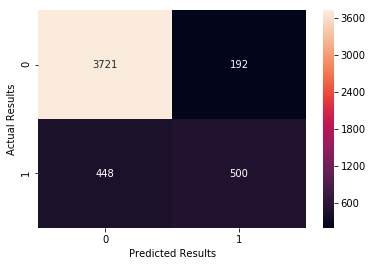

In [739]:
sb.heatmap(confusion_matrix(test_y,predicted),fmt='0.4g',annot=True)
plt.xlabel('Predicted Results')
plt.ylabel('Actual Results')

##### Hence, the accuracy of the model is 87% and overall f1-score is 86%